### A few initial libraries ###

In [29]:
import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ
from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeBogota
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo
# The pulse simulator
from qiskit.providers.aer import PulseSimulator

# Object for representing physical models
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import NoiseModel

from gate_variants.toffoli_variants import CCX_Variant_Gate 
from orientation_map import orientation_map_gen

from trios_bench.cnx_dirty import generate_dirty_multicontrol
from trios_bench.cnx_halfdirty import generate_cnx_halfdirty
from trios_bench.cnx_logdepth import generate_cnx_log_depth
from trios_bench.cnx_inplace import generate_cnx_inplace
from trios_bench.cuccaro_adder import generate_cuccaro_adder
from trios_bench.Takahashi_adder import generate_takahashi_adder
from trios_bench.incrementer_borrowedbit import generate_incrementer
from trios_bench.grovers_integer_search import generate_grover_integer_search_circuit
from trios_bench.qaoa import generate_random_QAOA
from trios_bench.sym6 import generate_sym6

In [30]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### Load device and the device configuration object ###

In [31]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q-ornl')
# device = FakeMumbai()

# backend_prop = device.properties()

ibmqfactory.load_account:WARNING:2022-04-12 16:00:45,380: Credentials are already in use. The existing account in the session will be replaced.


In [32]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider

In [33]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [34]:
from level3_context import _parse_transpile_args, level_3_context_pass_manager
from level3_context_pulse import level_3_swap_pulse_pass_manager, level_3_pass_manager, level_3_orign_pulse_pass_manager, level_3_context_pulse_pass_manager, level_3_pulse_pass_manager

In [35]:
qc0 = generate_dirty_multicontrol(6, 11)
qc1 = generate_cnx_halfdirty(19)
qc2 = generate_cnx_log_depth(19)
qc3 = generate_cnx_inplace(4)
qc4 = generate_cuccaro_adder(20)
qc5 = generate_takahashi_adder(20)
qc6 = generate_incrementer(5)
qc7 = generate_grover_integer_search_circuit(6, 3, 0, maxn=None, num_rounds=None)
qc8 = generate_random_QAOA(10, 0.6, 2)
qc9 = generate_sym6()
qc_list = [qc0, qc1, qc2, qc3, qc4, qc5,qc6, qc7, qc8, qc9]

In [36]:
result_lists = []
for qc in qc_list:
    result_lists.append(generate_results(qc, pass_manager_config))

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
16: Qubit(QuantumRegister(18, 'q'), 0),
18: Qubit(QuantumRegister(18, 'q'), 1),
14: Qubit(QuantumRegister(18, 'q'), 2),
15: Qubit(QuantumRegister(18, 'q'), 3),
13: Qubit(QuantumRegister(18, 'q'), 4),
11: Qubit(QuantumRegister(18, 'q'), 5),
9: Qubit(QuantumRegister(18, 'q'), 6),
12: Qubit(QuantumRegister(18, 'q'), 7),
8: Qubit(QuantumRegister(18, 'q'), 8),
10: Qubit(QuantumRegister(18, 'q'), 9),
6: Qubit(QuantumRegister(18, 'q'), 10),
5: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
3: Qubit(QuantumRegister(18, 'q'), 13),
4: Qubit(QuantumRegister(18, 'q'), 14),
2: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegiste

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
16: Qubit(QuantumRegister(18, 'q'), 0),
18: Qubit(QuantumRegister(18, 'q'), 1),
14: Qubit(QuantumRegister(18, 'q'), 2),
15: Qubit(QuantumRegister(18, 'q'), 3),
13: Qubit(QuantumRegister(18, 'q'), 4),
11: Qubit(QuantumRegister(18, 'q'), 5),
9: Qubit(QuantumRegister(18, 'q'), 6),
12: Qubit(QuantumRegister(18, 'q'), 7),
8: Qubit(QuantumRegister(18, 'q'), 8),
10: Qubit(QuantumRegister(18, 'q'), 9),
6: Qubit(QuantumRegister(18, 'q'), 10),
5: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
3: Qubit(QuantumRegister(18, 'q'), 13),
4: Qubit(QuantumRegister(18, 'q'), 14),
2: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegister(18, 'q'), 16),
0: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for the toffoli are:  14 11 8
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
successor swap two intersectio

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
16: Qubit(QuantumRegister(18, 'q'), 0),
18: Qubit(QuantumRegister(18, 'q'), 1),
14: Qubit(QuantumRegister(18, 'q'), 2),
15: Qubit(QuantumRegister(18, 'q'), 3),
13: Qubit(QuantumRegister(18, 'q'), 4),
11: Qubit(QuantumRegister(18, 'q'), 5),
9: Qubit(QuantumRegister(18, 'q'), 6),
12: Qubit(QuantumRegister(18, 'q'), 7),
8: Qubit(QuantumRegister(18, 'q'), 8),
10: Qubit(QuantumRegister(18, 'q'), 9),
6: Qubit(QuantumRegister(18, 'q'), 10),
5: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
3: Qubit(QuantumRegister(18, 'q'), 13),
4: Qubit(QuantumRegister(18, 'q'), 14),
2: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegister(18, 'q'), 16),
0: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for the toffoli are:  14 11 8
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
successor swap two intersectio

intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegiste

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
16: Qubit(QuantumRegister(18, 'q'), 0),
18: Qubit(QuantumRegister(18, 'q'), 1),
14: Qubit(QuantumRegister(18, 'q'), 2),
15: Qubit(QuantumRegister(18, 'q'), 3),
13: Qubit(QuantumRegister(18, 'q'), 4),
11: Qubit(QuantumRegister(18, 'q'), 5),
9: Qubit(QuantumRegister(18, 'q'), 6),
12: Qubit(QuantumRegister(18, 'q'), 7),
8: Qubit(QuantumRegister(18, 'q'), 8),
10: Qubit(QuantumRegister(18, 'q'), 9),
6: Qubit(QuantumRegister(18, 'q'), 10),
5: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
3: Qubit(QuantumRegister(18, 'q'), 13),
4: Qubit(QuantumRegister(18, 'q'), 14),
2: Qubit(QuantumRegister(18, 'q'), 15),
1: Qubit(QuantumRegister(18, 'q'), 16),
0: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for the toffoli are:  14 11 8
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
successor swap two intersectio

intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegiste

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qubit(QuantumRegister(19, 'q'), 3),
15: Qubit(QuantumRegister(19, 'q'), 4),
13: Qubit(QuantumRegister(19, 'q'), 5),
11: Qubit(QuantumRegister(19, 'q'), 6),
9: Qubit(QuantumRegister(19, 'q'), 7),
12: Qubit(QuantumRegister(19, 'q'), 8),
8: Qubit(QuantumRegister(19, 'q'), 9),
10: Qubit(QuantumRegister(19, 'q'), 10),
6: Qubit(QuantumRegister(19, 'q'), 11),
5: Qubit(QuantumRegister(19, 'q'), 12),
7: Qubit(QuantumRegister(19, 'q'), 13),
3: Qubit(QuantumRegister(19, 'q'), 14)

('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qubit(QuantumRegister(19, 'q'), 3),
15: Qubit(QuantumRegister(19, 'q'), 4),
13: Qubit(QuantumRegister(19, 'q'), 5),
11: Qubit(QuantumRegister(19, 'q'), 6),
9: Qubit(QuantumRegister(19, 'q'), 7),
12: Qubit(QuantumRegister(19, 'q'), 8),
8: Qubit(QuantumRegister(19, 'q'), 9),
10: Qubit(QuantumRegister(19, 'q'), 10),
6: Qubit(QuantumRegister(19, 'q'), 11),
5: Qubit(QuantumRegister(19, 'q'), 12),
7: Qubit(QuantumRegister(19, 'q'), 13),
3: Qubit(QuantumRegister(19, 'q'), 14),
4: Qubit(QuantumRegister(19, 'q'), 15),
2: Qubit(QuantumRegister(19, 'q'), 16),
1: Qubit(QuantumRegister(19, 'q'), 17),
0: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  0 4 1
The required 

intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8)]
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
intersect [Qubit(QuantumRegister(27, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qubit(QuantumRegister(19, 'q'), 3),
15: Qubit(QuantumRegister(19, 'q'), 4),
13: Qubit(QuantumRegister(19, 'q'), 5),
11: Qubit(QuantumRegister(19, 'q'), 6),
9: Qubit(QuantumRegister(19, 'q'), 7),
12: Qubit(QuantumRegister(19, 'q'), 8),
8: Qubit(QuantumRegister(19, 'q'), 9),
10: Qubit(QuantumRegister(19, 'q'), 10),
6: Qubit(QuantumRegister(19, 'q'), 11),
5: Qubit(QuantumRegister(19, 'q'), 12),
7: Qubit(QuantumRegister(19, 'q'), 13),
3: Qubit(QuantumRegister(19, 'q'), 14),
4: Qubit(QuantumRegister(19, 'q'), 15),
2: Qubit(QuantumRegister(19, 'q'), 16),
1: Qubit(QuantumRegister(19, 'q'), 17),
0: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  0 4 1
The required 

look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('12', '01', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('01', '12', 'l1', 'p')
look for variant_rules ('01', '12', 'l0', 'p')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('01', '12', 'l1', 'p')
look for variant_rules ('01', '12', 'l2', 'p')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '02', 'l0', 's')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qubit(QuantumRegister(19, 'q'), 3),
15: Qubit(QuantumRegister(19, 'q'), 4),
13: Qubit(QuantumRegister(19, 'q'), 5),
11: Qubit(QuantumRegister(19, 'q'), 6),
9: Qubit(QuantumRegister(19, 'q'), 7),
12: Qubit(QuantumRegister(19, 'q'), 8),
8: Qubit(QuantumRegister(19, 'q'), 9),
10: Qubit(QuantumRegister(19, 'q'), 10),
6: Qubit(QuantumRegister(19, 'q'), 11),
5: Qubit(QuantumRegister(19, 'q'), 12),
7: Qubit(QuantumRegister(19, 'q'), 13),
3: Qubit(QuantumRegister(19, 'q'), 14),
4: Qubit(QuantumRegister(19, 'q'), 15),
2: Qubit(QuantumRe

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qubit(QuantumRegister(19, 'q'), 3),
15: Qubit(QuantumRegister(19, 'q'), 4),
13: Qubit(QuantumRegister(19, 'q'), 5),
11: Qubit(QuantumRegister(19, 'q'), 6),
9: Qubit(QuantumRegister(19, 'q'), 7),
12: Qubit(QuantumRegister(19, 'q'), 8),
8: Qubit(QuantumRegister(19, 'q'), 9),
10: Qubit(QuantumRegister(19, 'q'), 10),
6: Qubit(QuantumRegister(19, 'q'), 11),
5: Qubit(QuantumRegister(19, 'q'), 12),
7: Qubit(QuantumRegister(19, 'q'), 13),
3: Qubit(QuantumRegister(19, 'q'), 14),
4: Qubit(QuantumRegister(19, 'q'), 15),
2: Qubit(QuantumRegister(19, 'q'), 16),
1: Qubit(QuantumRegister(19, 'q'), 17),
0: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  11 5 8
The required toffoli will be decomposed using an 8 cnot decomposition - 

intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00'

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
17: Qubit(QuantumRegister(19, 'q'), 0),
16: Qubit(QuantumRegister(19, 'q'), 1),
18: Qubit(QuantumRegister(19, 'q'), 2),
14: Qubit(QuantumRegister(19, 'q'), 3),
15: Qubit(QuantumRegister(19, 'q'), 4),
13: Qubit(QuantumRegister(19, 'q'), 5),
11: Qubit(QuantumRegister(19, 'q'), 6),
9: Qubit(QuantumRegister(19, 'q'), 7),
12: Qubit(QuantumRegister(19, 'q'), 8),
8: Qubit(QuantumRegister(19, 'q'), 9),
10: Qubit(QuantumRegister(19, 'q'), 10),
6: Qubit(QuantumRegister(19, 'q'), 11),
5: Qubit(QuantumRegister(19, 'q'), 12),
7: Qubit(QuantumRegister(19, 'q'), 13),
3: Qubit(QuantumRegister(19, 'q'), 14),
4: Qubit(QuantumRegister(19, 'q'), 15),
2: Qubit(QuantumRegister(19, 'q'), 16),
1: Qubit(QuantumRegister(19, 'q'), 17),
0: Qubit(QuantumRegister(19, 'q'), 18)
})
The physical qubits for the toffoli are:  11 5 8
The required toffoli will be decomposed using an 8 cnot decomposition - 

intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00'

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
4: Qubit(QuantumRegister(4, 'q'), 0),
2: Qubit(QuantumRegister(4, 'q'), 1),
1: Qubit(QuantumRegister(4, 'q'), 2),
0: Qubit(QuantumRegister(4, 'q'), 3)
})
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed

The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  4 1 0
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 0 4
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 0 4
The required 

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11

sub_tag before optimize ['21', '00', 'l0', 'p']
the optimized substituted tag ['21', '00', 'l0', 'p']
initialized variant_tag: ('21', '00', 'l0', 'p')
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor cx two intersection conditions:TrueTrue
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  1 0 2
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
sub_tag before optimize ['21', '00', 'l0', 'p']
three intersection conditions False True False
three qargs Qubit(QuantumRegister(27, 'q'), 1) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
4: Qubit(QuantumRegister(4, 'q'), 0),
2: Qubit(QuantumRegister(4, 'q'), 1),
1: Qubit(QuantumRegister(4, 'q'), 2),
0: Qubit(QuantumRegister(4, 'q'), 3)
})
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
three intersection conditions True True False
three qargs Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['01', '00', 'l2', 'p']
predecessor swap two intersection conditions:TrueTrue
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  4 0 1
The required toffoli will be decomposed using an 8 cnot decompositio

l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '01', 'l1', 's')
look for variant_rules ('21', '00', 'l1', 'p')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l

intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(Qu

three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l2', 's'] ['21', '00', 'l2', 'p']
predecessor cx two intersection conditions:TrueTrue
predecessor swap two intersection conditions:TrueFalse
initialized variant_tag: ('12', '01', 'l2', 's')
The physical qubits for the toffoli are:  1 0 2
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
sub_tag before optimize ['21', '00', 'l0', 'p']
three intersection conditions False True False
three qargs Qubit(QuantumRegister(27, 'q'), 1) Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 2)
calculated tags for substituted ['21', '00', 'l0', 'p'] ['00', '00', 'l0', 'p']
the optimized substituted tag ['21', '00', 'l0', 'p']
initialized variant_tag: ('21', '00', 'l0', 'p')
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed 

look for variant_rules ('12', '01', 'l1', 's')
look for variant_rules ('21', '00', 'l1', 'p')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l2', 's')
didn't find match tag
l2 ['00', '01', 'l2', 's']
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '00', 'l0', 'p')
didn't find match tag
l0 ['21', '00', 'l0', 'p']
look 

('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
(

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
21: Qubit(QuantumRegister(20, 'q'), 0),
17: Qubit(QuantumRegister(20, 'q'), 1),
16: Qubit(QuantumRegister(20, 'q'), 2),
18: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
15: Qubit(QuantumRegister(20, 'q'), 5),
13: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
9: Qubit(QuantumRegister(20, 'q'), 8),
12: Qubit(QuantumRegister(20, 'q'), 9),
8: Qubit(QuantumRegister(20, 'q'), 10),
10: Qubit(QuantumRegister(20, 'q'), 11),
6: Qubit(QuantumRegister(20, 'q'), 12),
5: Qubit(QuantumRegister(20, 'q'), 13),
7: Qubit(QuantumRegister(20, 'q'), 14),
3: Qubit(QuantumRegister(20, 'q'), 15),
4: Qubit(Quan

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
21: Qubit(QuantumRegister(20, 'q'), 0),
17: Qubit(QuantumRegister(20, 'q'), 1),
16: Qubit(QuantumRegister(20, 'q'), 2),
18: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
15: Qubit(QuantumRegister(20, 'q'), 5),
13: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
9: Qubit(QuantumRegister(20, 'q'), 8),
12: Qubit(QuantumRegister(20, 'q'), 9),
8: Qubit(QuantumRegister(20, 'q'), 10),
10: Qubit(QuantumRegister(20, 'q'), 11),
6: Qubit(QuantumRegister(20, 'q'), 12),
5: Qubit(QuantumRegister(20, 'q'), 13),
7: Qubit(QuantumRegister(20, 'q'), 14),
3: Qubit(QuantumRegister(20, 'q'), 15),
4: Qubit(QuantumRegister(20, 'q'), 16),
2: Qubit(QuantumRegister(20, 'q'), 17),
1: Qubit(QuantumRegister(20, 'q'), 18),
0: Qubit(QuantumRegister(20, 'q'), 19)
})
The physical qubits for the toffoli are:  21 15 18
The required toffoli will

intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8)]
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 11), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 11), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 14), Qubit(QuantumRegister

intersect [Qubit(QuantumRegister(27, 'q'), 21), Qubit(QuantumRegister(27, 'q'), 18)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 18), Qubit(QuantumRegister(27, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 18), Qubit(QuantumRegister(27, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 12), Qubit(QuantumRegister(27, 'q'), 13)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 13)]
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'

('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 11)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 11)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 11)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 11)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 16), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 14)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 11)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 14), Qubit(QuantumRegi

intersect [Qubit(QuantumRegister(27, 'q'), 12)]
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
intersect [Qubit(QuantumRegister(27, 'q'), 15)]
intersect [Qubit(QuantumRegister(27, 'q'), 18)]
intersect [Qubit(QuantumRegister(27, 'q'), 15)]
intersect [Qubit(QuantumRegister(27, 'q'), 15)]
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
intersect [Qubit(QuantumRegister(27, 'q'), 13)]
intersect [Qubit(QuantumRegister(27, 'q'), 13)]
intersect [Qubit(QuantumRegister(27, 'q'), 14)]
intersect [Qubit(QuantumRegister(27, 'q'), 14)]
intersect [Qubit(QuantumRegister(27, 'q'), 11)]
intersect [Qubit(QuantumRegister(27, 'q'), 18)]
intersect [Qubit(QuantumRegister(27, 'q'), 18)]
intersect [Qubit(QuantumRegister(27, 'q'), 15)]
intersect [Qubit(QuantumRegister(27, 'q'), 15)]
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
intersect [Qubit(QuantumRegister(27, 'q'), 13)]
intersect [Qubit(QuantumRegister(27, 'q'

intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8)]
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 11), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 11), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 14), Qubit(QuantumRegister

intersect [Qubit(QuantumRegister(27, 'q'), 7)]
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
intersect [Qubit(QuantumRegister(27, 'q'), 10)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 10)]
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 12), Qubit(QuantumRegister(27, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 15)]
('00', '11', 

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
21: Qubit(QuantumRegister(20, 'q'), 0),
17: Qubit(QuantumRegister(20, 'q'), 1),
16: Qubit(QuantumRegister(20, 'q'), 2),
18: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
15: Qubit(QuantumRegister(20, 'q'), 5),
13: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
9: Qubit(QuantumRegister(20, 'q'), 8),
12: Qubit(QuantumRegister(20, 'q'), 9),
8: Qubit(QuantumRegister(20, 'q'), 10),
10: Qubit(QuantumRegister(20, 'q'), 11),
6: Qubit(QuantumRegister(20, 'q'), 12),
5: Qubit(QuantumRegister(20, 'q'), 13),
7: Qubit(QuantumRegister(20, 'q'), 14),
3: Qubit(QuantumRegister(20, 'q'), 15),
4: Qubit(Quan

('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
21: Qubit(QuantumRegister(20, 'q'), 0),
17: Qubit(QuantumRegister(20, 'q'), 1),
16: Qubit(QuantumRegister(20, 'q'), 2),
18: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
15: Qubit(QuantumRegister(20, 'q'), 5),
13: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
9: Qubit(QuantumRegister(20, 'q'), 8),
12: Qubit(QuantumRegister(20, 'q'), 9),
8: Qubit(QuantumRegister(20, 'q'), 10),
10: Qubit(QuantumRegister(20, 'q'), 11),
6: Qubit(QuantumRegister(20, 'q'), 12),
5: Qubit(QuantumRegister(20, 'q'), 13),
7: Qubit(QuantumRegister(20, 'q'), 14),
3: Qubit(QuantumRegister(20, 'q'), 15),
4: Qubit(QuantumRegister(20, 'q'), 16),
2: Qubit(QuantumRegister(20, 'q'), 17),
1: Qubit(QuantumRegister(20, 'q'), 18),
0: Qubit(QuantumRegister(20, 'q'), 19)
})
The physical qubits for the toffoli are:  4 2 1
The required toffoli will be

intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8)]
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5)]
intersect [Qubit(QuantumRegister(27, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f

intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 11)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 11)]
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 9), Qubit(QuantumRegister(27, 'q'), 8)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 8), Qubit(QuantumRegister(27, 'q'), 11)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 13), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 13), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11

('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 14), Qubit(QuantumRegister(27, 'q'), 13)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 14), Qubit(QuantumRegister(27, 'q'), 16)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 13), Qubit(QuantumRegister(27, 'q'), 14)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 13), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 12), Qubit(QuantumRegister(27, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 12), Qubit(QuantumRegister(27, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister(27, 'q'), 18)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister

look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['00', '00', 'l0', 'p']
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('02', '00', 'l2', 'p')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('12', '02', 'l2', 's')
final tag, three match ('21', '02', 'l2', 's')
look for variant_rules ('01', '00', 'l0', 'p')
final tag, one match ('10', '02', 'l0', 'p')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('12', '02', 'l2', 's')
final tag, three match ('21', '02', 'l2', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('12', '02', 'l2', 's')
final tag, three match ('21', '02', 'l2', 's')
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('

intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 17), Qubit(QuantumRegister(27, 'q'), 18)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'f')
('11', '00',

intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister(27, 'q'), 18)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister(27, 'q'), 18)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 15), Qubit(QuantumRegister(27, 'q'), 18)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 12), Qubit(QuantumRegister(27, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 17), Qubit(QuantumRegister(27, 'q'), 18)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
3: Qubit(QuantumRegister(5, 'q'), 0),
2: Qubit(QuantumRegister(5, 'q'), 1),
4: Qubit(QuantumRegister(5, 'q'), 2),
1: Qubit(QuantumRegister(5, 'q'), 3),
0: Qubit(QuantumRegister(5, 'q'), 4)
})
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  1 0 2
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  1 0 2
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
The physical qubits for the toffoli are:  2 0 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits 

('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11

The physical qubits for the toffoli are:  2 3 1
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 3) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l0', 's'] ['21', '00', 'l0', 'p']
initialized variant_tag: ('00', '01', 'l0', 's')
The physical qubits for the toffoli are:  1 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
sub_tag before optimize ['21', '00', 'l2', 'p']
the optimized substituted tag ['21', '00', 'l2', 'p']
initialized variant_tag: ('21', '00', 'l2', 'p')
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '01', 'l0', 'p')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('21',

look for variant_rules ('12', '01', 'l1', 's')
look for variant_rules ('21', '00', 'l1', 'p')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('21', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('12', '01', 'l2', 's')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('21', '01', 'l0', 'p')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('00', '01', 'l0', 's')
final tag, one match ('02', '10', 'l0', 's')
look for variant_rules ('21', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('02', '02', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l0', 'p')
didn't find match tag
l0 ['00', '00', 'l0', 'p']
look for variant_rules ('01',

intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
(

sub_tag before optimize ['21', '00', 'l0', 'p']
three intersection conditions True True False
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 3) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags for substituted ['21', '01', 'l0', 'p'] ['01', '00', 'l0', 'p']
the optimized substituted tag ['21', '01', 'l0', 'p']
initialized variant_tag: ('21', '01', 'l0', 'p')
The physical qubits for the toffoli are:  2 3 1
The required toffoli will be decomposed using an 8 cnot decomposition - zero in center
three intersection conditions True True True
three qargs Qubit(QuantumRegister(27, 'q'), 2) Qubit(QuantumRegister(27, 'q'), 3) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '01', 'l0', 's'] ['21', '00', 'l0', 'p']
initialized variant_tag: ('00', '01', 'l0', 's')
The physical qubits for the toffoli are:  1 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
sub_tag before optimize ['21', '00', 'l2', 'p']
the optimized 

intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 0), Qubit(QuantumRegister(27, 'q'), 1)]
(

('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
('11', '00', 'f')
i

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
10: Qubit(QuantumRegister(9, 'q'), 0),
6: Qubit(QuantumRegister(9, 'q'), 1),
5: Qubit(QuantumRegister(9, 'q'), 2),
7: Qubit(QuantumRegister(9, 'q'), 3),
3: Qubit(QuantumRegister(9, 'q'), 4),
4: Qubit(QuantumRegister(9, 'q'), 5),
2: Qubit(QuantumRegister(9, 'q'), 6),
1: Qubit(QuantumRegister(9, 'q'), 7),
0: Qubit(QuantumRegister(9, 'q'), 8)
})
The physical qubits for the toffoli are:  2 4 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  10 4 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center


The physical qubits for the toffoli are:  5 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  2 1 4
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  10 4 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  5 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  10 4 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
The physical qubits for the toffoli are:  5 3 2
The required

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00

('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
10: Qubit(QuantumRegister(9, 'q'), 0),
6: Qubit(QuantumRegister(9, 'q'), 1),
5: Qubit(QuantumRegister(9, 'q'), 2),
7: Qubit(QuantumRegister(9, 'q'), 3),
3: Qubit(QuantumRegister(9, 'q'), 4),
4: Qubit(QuantumRegister(9, 'q'), 5),
2: Qubit(QuantumRegister(9, 'q'), 6),
1: Qubit(QuantumRegister(9, 'q'), 7),
0: 

initialized variant_tag: ('01', '00', 'l1', 'p')
The physical qubits for the toffoli are:  10 4 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
three intersection conditions True False False
three qargs Qubit(QuantumRegister(27, 'q'), 10) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 7)
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
successor swap two intersection conditions:TrueTrue
initialized variant_tag: ('00', '12', 'l2', 's')
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
three intersection conditions True False False
three qargs Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
two intersection conditions False True
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
initialized variant_t

look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('02', '00', 'l2', 'p')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('02', '12', 'l2', 's')
final tag, three match ('20', '12', 'l2', 's')
look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
look for variant_rules ('00', '12', 'l1', 's')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match t

three intersection conditions False False True
three qargs Qubit(QuantumRegister(27, 'q'), 10) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 7)
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
predecessor swap two intersection conditions:TrueTrue
initialized variant_tag: ('12', '00', 'l2', 'p')
The physical qubits for the toffoli are:  5 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
sub_tag before optimize ['01', '00', 'l1', 'p']
three intersection conditions False False True
three qargs Qubit(QuantumRegister(27, 'q'), 5) Qubit(QuantumRegister(27, 'q'), 3) Qubit(QuantumRegister(27, 'q'), 2)
calculated tags for substituted ['01', '00', 'l1', 'p'] ['00', '00', 'l1', 'p']
the optimized substituted tag ['01', '00', 'l1', 'p']
initialized variant_tag: ('01', '00', 'l1', 'p')
The physical qubits for the toffoli are:  10 4 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
thre

look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match

('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Q

('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 6), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegist

three intersection conditions True False False
three qargs Qubit(QuantumRegister(27, 'q'), 0) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 1)
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
two intersection conditions False True
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
initialized variant_tag: ('00', '00', 'l2', 'p')
The physical qubits for the toffoli are:  5 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
three intersection conditions True True False
three qargs Qubit(QuantumRegister(27, 'q'), 5) Qubit(QuantumRegister(27, 'q'), 3) Qubit(QuantumRegister(27, 'q'), 2)
calculated tags ['00', '01', 'l1', 's'] ['01', '00', 'l1', 'p']
initialized variant_tag: ('00', '01', 'l1', 's')
The physical qubits for the toffoli are:  2 1 4
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
calculated tags ['00', '00', 'l1', 'p'] ['00', '00', 'l1', 'p']
two intersec

The physical qubits for the toffoli are:  5 3 2
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
sub_tag before optimize ['01', '00', 'l1', 'p']
three intersection conditions False False True
three qargs Qubit(QuantumRegister(27, 'q'), 5) Qubit(QuantumRegister(27, 'q'), 3) Qubit(QuantumRegister(27, 'q'), 2)
calculated tags for substituted ['01', '00', 'l1', 'p'] ['00', '00', 'l1', 'p']
the optimized substituted tag ['01', '00', 'l1', 'p']
initialized variant_tag: ('01', '00', 'l1', 'p')
The physical qubits for the toffoli are:  10 4 7
The required toffoli will be decomposed using an 8 cnot decomposition - two in center
three intersection conditions True False False
three qargs Qubit(QuantumRegister(27, 'q'), 10) Qubit(QuantumRegister(27, 'q'), 4) Qubit(QuantumRegister(27, 'q'), 7)
calculated tags ['00', '00', 'l2', 'p'] ['00', '00', 'l2', 'p']
successor swap two intersection conditions:TrueTrue
initialized variant_tag: ('00', '12', 'l2', 's')
The ph

look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match tag
l1 ['00', '00', 'l1', 'p']
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('12', '00', 'l2', 'p')
final tag, one match ('21', '02', 'l2', 's')
look for variant_rules ('01', '00', 'l1', 'p')
final tag, one match ('01', '12', 'l1', 'p')
look for variant_rules ('00', '12', 'l2', 's')
final tag, one match ('02', '21', 'l2', 'p')
look for variant_rules ('00', '00', 'l2', 'p')
didn't find match tag
l2 ['00', '00', 'l2', 'p']
look for variant_rules ('00', '01', 'l1', 's')
final tag, one match ('12', '01', 'l1', 's')
look for variant_rules ('00', '00', 'l1', 'p')
didn't find match

('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 6)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect

intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 6)]
(

/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/reviloo

No solution found:  nonexistent solution
Layout({
8: Qubit(QuantumRegister(10, 'q'), 0),
10: Qubit(QuantumRegister(10, 'q'), 1),
6: Qubit(QuantumRegister(10, 'q'), 2),
5: Qubit(QuantumRegister(10, 'q'), 3),
7: Qubit(QuantumRegister(10, 'q'), 4),
3: Qubit(QuantumRegister(10, 'q'), 5),
4: Qubit(QuantumRegister(10, 'q'), 6),
2: Qubit(QuantumRegister(10, 'q'), 7),
1: Qubit(QuantumRegister(10, 'q'), 8),
0: Qubit(QuantumRegister(10, 'q'), 9)
})


/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/reviloo

('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00

/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/reviloo

No solution found:  nonexistent solution
Layout({
8: Qubit(QuantumRegister(10, 'q'), 0),
10: Qubit(QuantumRegister(10, 'q'), 1),
6: Qubit(QuantumRegister(10, 'q'), 2),
5: Qubit(QuantumRegister(10, 'q'), 3),
7: Qubit(QuantumRegister(10, 'q'), 4),
3: Qubit(QuantumRegister(10, 'q'), 5),
4: Qubit(QuantumRegister(10, 'q'), 6),
2: Qubit(QuantumRegister(10, 'q'), 7),
1: Qubit(QuantumRegister(10, 'q'), 8),
0: Qubit(QuantumRegister(10, 'q'), 9)
})


/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/reviloo

intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27,

No solution found:  nonexistent solution
Layout({
8: Qubit(QuantumRegister(10, 'q'), 0),
10: Qubit(QuantumRegister(10, 'q'), 1),
6: Qubit(QuantumRegister(10, 'q'), 2),
5: Qubit(QuantumRegister(10, 'q'), 3),
7: Qubit(QuantumRegister(10, 'q'), 4),
3: Qubit(QuantumRegister(10, 'q'), 5),
4: Qubit(QuantumRegister(10, 'q'), 6),
2: Qubit(QuantumRegister(10, 'q'), 7),
1: Qubit(QuantumRegister(10, 'q'), 8),
0: Qubit(QuantumRegister(10, 'q'), 9)
})
intersect [Qubit(QuantumRegister(27, 'q'), 11)]
intersect [Qubit(QuantumRegister(27, 'q'), 14)]
intersect [Qubit(QuantumRegister(27, 'q'), 13)]
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
intersect [Qubit(QuantumRegister(27, 'q'), 2)]
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
t

/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/revilooliver/Documents/quantum_computing/research/context_aware_decomposition/context-aware-decomposition/qiskit-terra-0.18.3/qiskit/transpiler/runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['cx', 'rz', 'sx', 'x', 'acecr_pm']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
/Users/reviloo

intersect [Qubit(QuantumRegister(27, 'q'), 10), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 7)]
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27,

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
8: Qubit(QuantumRegister(10, 'q'), 0),
10: Qubit(QuantumRegister(10, 'q'), 1),
6: Qubit(QuantumRegister(10, 'q'), 2),
5: Qubit(QuantumRegister(10, 'q'), 3),
7: Qubit(QuantumRegister(10, 'q'), 4),
3: Qubit(QuantumRegister(10, 'q'), 5),
4: Qubit(QuantumRegister(10, 'q'), 6),
2: Qubit(QuantumRegister(10, 'q'), 7),
1: Qubit(QuantumRegister(10, 'q'), 8),
0: Qubit(QuantumRegister(10, 'q'), 9)
})
The physical qubits for the toffoli are:  12 10 7
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physical qubits for the toffoli are:  6 7 4
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
The physic

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
8: Qubit(QuantumRegister(10, 'q'), 0),
10: Qubit(QuantumRegister(10, 'q'), 1),
6: Qubit(QuantumRegister(10, 'q'), 2),
5: Qubit(QuantumRegister(10, 'q'), 3),
7: Qubit(QuantumRegister(10, 'q'), 4),
3: Qubit(QuantumRegister(10, 'q'), 5),
4: Qubit(QuantumRegister(10, 'q'), 6),
2: Qubit(QuantumRegister(10, 'q'), 7),
1: Qubit(QuantumRegister(10, 'q'), 8),
0: Qubit(QuantumRegister(10, 'q'), 9)
})
The physical qubits for the toffoli are:  12 10 7
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
successor cx two intersection conditions:TrueTrue
calculated tags ['00', '01', 'l1', 's'] ['00', '00', 'l1', 'p']
initialized variant_tag: ('00', '01', 'l1', 's')
The physical qubits for the toffoli are:  6 7 4
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
two intersection conditions True True
calculated tags ['00', '01', 'l1',

intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
No solution found:  nonexistent solution
Layout({
8: Qubit(QuantumRegister(10, 'q'), 0),
10: Qubit(QuantumRegister(10, 'q'), 1),
6: Qubit(QuantumRegister(10, 'q'), 2),
5: Qubit(QuantumRegister(10, 'q'), 3),
7: Qubit(QuantumRegister(10, 'q'), 4),
3: Qubit(QuantumRegister(10, 'q'), 5),
4: Qubit(QuantumRegister(10, 'q'), 6),
2: Qubit(QuantumRegister(10, 'q'), 7),
1: Qubit(QuantumRegister(10, 'q'), 8),
0: Qubit(QuantumRegister(10, 'q'), 9)
})
The physical qubits for the toffoli are:  12 10 7
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
successor cx two intersection conditions:TrueTrue
calculated tags ['00', '01', 'l1', 's'] ['00', '00', 'l1', 'p']
initialized variant_tag: ('00', '01', 'l1', 's')
The physical qubits for the toffoli are:  6 7 4
The required toffoli will be decomposed using an 8 cnot decomposition - one in center
two intersection conditions True True
calculated tags ['00', '01', 'l1',

intersect [Qubit(QuantumRegister(27, 'q'), 2), Qubit(QuantumRegister(27, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 5), Qubit(QuantumRegister(27, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 3), Qubit(QuantumRegister(27, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 4), Qubit(QuantumRegister(27, 'q'), 7)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 4)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 'q'), 1), Qubit(QuantumRegister(27, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(27, 

In [37]:
def success_rate(op_dict, display = False, total_time = 100, t1 = 70000, t2 = 72000, cx_error = 0.01, cr_error = 0.01, sx_error = 0.0004, x_error = 0.0008, ccx_error = 0.02):
    try:
        sx_count = op_dict['sx']
    except:
        sx_count = 0
    try:
        x_count = op_dict['x']
    except:
        x_count = 0
    try:
        cx_count = op_dict['cx']
    except:
        cx_count = 0
    try:
        cr_count = op_dict['acecr_pm']
    except:
        cr_count = 0
    try:
        ccx_count = op_dict['ccx']
    except:
        ccx_count = 0
    pst = np.exp(- 10 * total_time / t1 - 10 * total_time / t2) * (1 - sx_error) ** sx_count \
    * (1 - x_error) ** x_count * (1 - cx_error) ** cx_count * (1 - ccx_error) ** ccx_count * (1 - cr_error) ** cr_count
    if display == True:
        print("Total Time:{}, T1:{}, T2:{}, success_rate:{}".format(total_time, t1, t2, np.exp(-10 * total_time / t1 - 10 * total_time / t2)))
        print("sx_count:{}, sx_error:{}, sx_success_rate:{}".format(sx_count, sx_error, (1 - sx_error) ** sx_count))
        print("x_count:{}, x_error:{}, x_success_rate:{}".format(x_count, x_error, (1 - x_error) ** x_count))
        print("cx_count:{}, cx_error:{}, cx_success_rate:{}".format(cx_count, cx_error, (1 - cx_error) ** cx_count))
        print("cr_count:{}, cr_error:{}, cr_success_rate:{}".format(cr_count, cr_error, (1 - cr_error) ** cr_count))
        print("ccx_count:{}, ccx_error:{}, ccx_success_rate:{}".format(ccx_count, ccx_error, (1 - ccx_error) ** ccx_count))
    return pst

In [38]:
for index in range(0, len(result_lists)):
    print("qc", index)
    for i in result_lists[index]:
        print(i.count_ops())
        print(success_rate(i.count_ops()))

qc 0
OrderedDict([('cx', 248), ('rz', 163), ('sx', 47), ('x', 2)])
0.07878266479841399
OrderedDict([('rz', 664), ('sx', 422), ('acecr_pm', 248), ('x', 120)])
0.06169637607858118
OrderedDict([('cx', 238), ('rz', 177), ('sx', 61), ('x', 6)])
0.08634871648199778
OrderedDict([('rz', 583), ('sx', 384), ('acecr_pm', 238), ('x', 60)])
0.07267161035634159
OrderedDict([('rz', 583), ('sx', 384), ('acecr_pm', 238), ('x', 61)])
0.07261347306805652
qc 1
OrderedDict([('cx', 421), ('rz', 294), ('sx', 75), ('x', 3)])
0.013680648545543623
OrderedDict([('rz', 1134), ('sx', 710), ('acecr_pm', 421), ('x', 246)])
0.008736011228566938
OrderedDict([('cx', 397), ('rz', 317), ('sx', 104), ('x', 8)])
0.017142940537149886
OrderedDict([('rz', 968), ('sx', 640), ('acecr_pm', 397), ('x', 110)])
0.01274974038613607
OrderedDict([('rz', 968), ('sx', 640), ('acecr_pm', 397), ('x', 110)])
0.01274974038613607
qc 2
OrderedDict([('cx', 358), ('rz', 180), ('sx', 48), ('x', 1)])
0.026090109054087728
OrderedDict([('rz', 946),

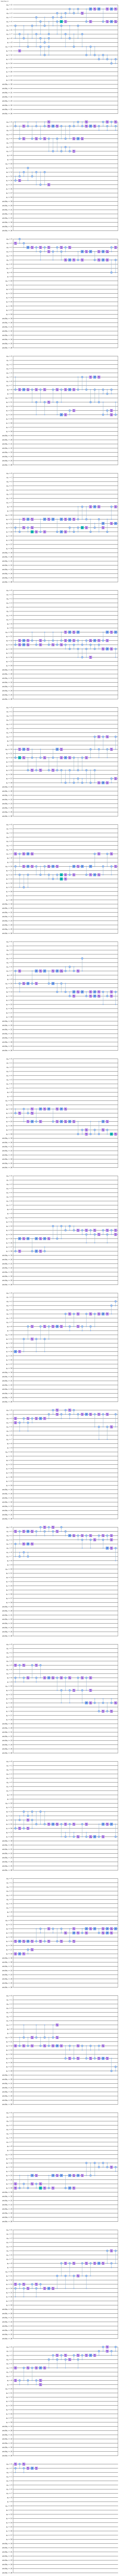

In [28]:
result_lists[1][-3].draw(output='mpl')

In [9]:
backend = provider.get_backend('ibmq_montreal')

In [10]:
backend_monitor(backend)

ibmq_montreal
Configuration
-------------
    n_qubits: 27
    operational: True
    status_msg: active
    pending_jobs: 1
    backend_version: 1.11.13
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    uchannels_enabled: True
    dtm: 0.2222222222222222
    multi_meas_enabled: True
    meas_map: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]]
    rep_times: [1000.0]
    timing_constraints: {'acquire_alignment': 16, 'granularity': 16, 'min_length': 64, 'pulse_alignment': 1}
    processor_type: {'family': 'Falcon', 'revision': 4}
    meas_lo_range: [[6.771393973, 7.771393973], [6.8857336160000004, 7.8857336160000004], [6.763340178, 7.763340178000001], [6.899158986000001, 7.899158986000001], [6.827607977, 7.827607977], [6.840916165, 7.840916165], [6.943263485, 7.943263485], [6.692122294000001, 7.692122294000001], [6.697564896, 7.697564896], [6.944852158000001, 7.944852158000001], [6.77084

Qubits [Name / Freq / T1 / T2 / RZ err / SX err / X err / Readout err]
----------------------------------------------------------------------
    Q0 / 4.91108 GHz / 142.14477 us / 135.20237 us / 0.00000 / 0.00023 / 0.00023 / 0.01330 
    Q1 / 4.83494 GHz / 193.82503 us / 41.31502 us / 0.00000 / 0.00015 / 0.00015 / 0.01380 
    Q2 / 4.98254 GHz / 81.06391 us / 70.81865 us / 0.00000 / 0.00042 / 0.00042 / 0.01850 
    Q3 / 5.10539 GHz / 87.54428 us / 32.36840 us / 0.00000 / 0.00032 / 0.00032 / 0.01330 
    Q4 / 5.00395 GHz / 161.94046 us / 205.57099 us / 0.00000 / 0.00029 / 0.00029 / 0.01700 
    Q5 / 5.03285 GHz / 82.06756 us / 66.17356 us / 0.00000 / 0.00041 / 0.00041 / 0.02180 
    Q6 / 4.95092 GHz / 151.39799 us / 31.51202 us / 0.00000 / 0.00039 / 0.00039 / 0.10900 
    Q7 / 4.90234 GHz / 120.36533 us / 125.79953 us / 0.00000 / 0.00030 / 0.00030 / 0.08530 
    Q8 / 4.90803 GHz / 121.80043 us / 95.65526 us / 0.00000 / 0.00026 / 0.00026 / 0.02500 
    Q9 / 5.04472 GHz / 81.47856 us / 93

In [11]:
backend_prop = backend.properties()

In [12]:
orientation_map = orientation_map_gen(backend)

In [13]:
coupling_map = [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]

In [15]:
transpile_args = _parse_transpile_args(qc_list, backend = None, coupling_map = coupling_map, basis_gates = ['cx', 'rz', 'sx', 'x', 'acecr_pm'], seed_transpiler = 0, orientation_map = orientation_map)

In [16]:
pass_manager_config = transpile_args[0]['pass_manager_config']

In [17]:
print(pass_manager_config.orientation_map)

{(0, 1): 'f', (1, 0): 'b', (1, 2): 'b', (1, 4): 'f', (2, 1): 'f', (2, 3): 'b', (3, 2): 'f', (3, 5): 'b', (4, 1): 'b', (4, 7): 'f', (5, 3): 'f', (5, 8): 'f', (6, 7): 'b', (7, 4): 'b', (7, 6): 'f', (7, 10): 'b', (8, 5): 'b', (8, 9): 'b', (8, 11): 'b', (9, 8): 'f', (10, 7): 'f', (10, 12): 'b', (11, 8): 'f', (11, 14): 'f', (12, 10): 'f', (12, 13): 'f', (12, 15): 'b', (13, 12): 'b', (13, 14): 'f', (14, 11): 'b', (14, 13): 'b', (14, 16): 'b', (15, 12): 'f', (15, 18): 'f', (16, 14): 'f', (16, 19): 'f', (17, 18): 'f', (18, 15): 'b', (18, 17): 'b', (18, 21): 'b', (19, 16): 'b', (19, 20): 'b', (19, 22): 'b', (20, 19): 'f', (21, 18): 'f', (21, 23): 'b', (22, 19): 'f', (22, 25): 'b', (23, 21): 'f', (23, 24): 'f', (24, 23): 'b', (24, 25): 'f', (25, 22): 'f', (25, 24): 'b', (25, 26): 'f', (26, 25): 'b'}


In [20]:
def generate_results(qc, pass_config):
    pm_orign = level_3_pass_manager(pass_manager_config)
    pm_orign_pulse = level_3_orign_pulse_pass_manager(pass_manager_config)
    pm_context = level_3_context_pass_manager(pass_manager_config)
    pm_context_pulse = level_3_context_pulse_pass_manager(pass_manager_config)
    pm_swap_pulse = level_3_swap_pulse_pass_manager(pass_manager_config)
    qc_orign = pm_orign.run(qc)
    qc_orign_pulse = pm_orign_pulse.run(qc)
    qc_context = pm_context.run(qc)
    qc_context_pulse = pm_context_pulse.run(qc)
    qc_swap_pulse = pm_swap_pulse.run(qc)
    return [qc_orign, qc_orign_pulse, qc_context, qc_context_pulse, qc_swap_pulse]

In [45]:
qc_orign.draw()

global phase: π/2
                 ┌─────────┐┌────┐┌─────────┐     ┌───┐     ┌─────────┐      »
        q_3 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤ X ├──■──┤ Rz(π/4) ├──────»
                 └──┬───┬──┘└────┘└──┬───┬──┘┌─┴─┐└─┬─┘┌─┴─┐├─────────┤┌────┐»
        q_2 -> 1 ───┤ X ├─────■──────┤ X ├───┤ X ├──■──┤ X ├┤ Rz(π/2) ├┤ √X ├»
                    └─┬─┘   ┌─┴─┐    └─┬─┘   └───┘     └───┘└─────────┘└────┘»
        q_1 -> 2 ─────■─────┤ X ├──────■─────────────────────────────────────»
                            └───┘                                            »
  ancilla_0 -> 3 ────────────────────────────────────────────────────────────»
                  ┌───────┐                                                  »
        q_0 -> 4 ─┤ Rz(π) ├──────────────────────────────────────────────────»
                  └───────┘                                                  »
  ancilla_1 -> 5 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_2 -> 6 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_3 -> 7 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_4 -> 8 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_5 -> 9 ────────────────────────────────────────────────────────────»
                                                                             »
 ancilla_6 -> 10 ────────────────────────────────────────────────────────────»
                                                                             »
 ancilla_7 -> 11 ────────────────────────────────────────────────────────────»
                                                                             »
 ancilla_8 -> 12 ────────────────────────────────────────────────────────────»
                                                                             »
 ancilla_9 -> 13 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_10 -> 14 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_11 -> 15 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_12 -> 16 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_13 -> 17 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_14 -> 18 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_15 -> 19 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_16 -> 20 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_17 -> 21 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_18 -> 22 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_19 -> 23 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_20 -> 24 ────────────────────────────────────────────────────────────»
                                

In [64]:
#generate the noise model based on selected device
noise_model = NoiseModel.from_backend(backend)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['measure', 'reset', 'cx', 'sx', 'id', 'x']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('id', [5]), ('id', [6]), ('id', [7]), ('id', [8]), ('id', [9]), ('id', [10]), ('id', [11]), ('id', [12]), ('id', [13]), ('id', [14]), ('id', [15]), ('id', [16]), ('id', [17]), ('id', [18]), ('id', [19]), ('id', [20]), ('id', [21]), ('id', [22]), ('id', [23]), ('id', [24]), ('id', [25]), ('id', [26]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('sx', [5]), ('sx', [6]), ('sx', [7]), ('sx', [8]), ('sx', [9]), ('sx', [10]), ('sx', [11]), ('sx', [12]), ('sx', [13]), ('sx', [14]), ('sx', [15]), ('sx', [16]), ('sx', [17]), ('sx', [18]), ('sx', [19]), ('sx', [20]), ('sx', [21]), ('sx', [22]), ('sx', [23]), ('sx', [24]), ('sx', [2

In [67]:
#create simulators with noise model
simulator = provider.get_backend('ibmq_qasm_simulator')
state_simulator = AerSimulator(method='statevector')
state_simulator_noisy = AerSimulator(method='statevector',noise_model=noise_model)

In [85]:
qc_orign_job = execute(qc_orign, backend=state_simulator_noisy, optimization_level=0, shots=8192)

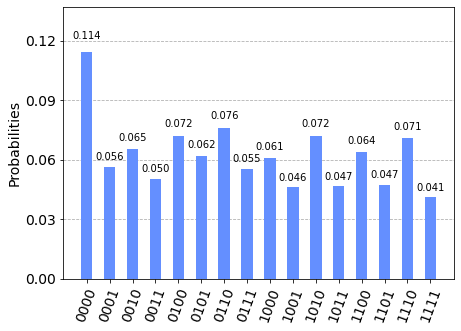

In [90]:
plot_histogram(qc_orign_job.result().get_counts())

In [87]:
qc_context_pulse_job = execute(qc_context_pulse, backend=state_simulator_noisy, optimization_level=0, shots=8192)

In [88]:
qc_context_pulse_job.result().get_counts()

{'0000': 532,
 '1001': 485,
 '0010': 539,
 '1011': 475,
 '0110': 588,
 '1100': 507,
 '0100': 524,
 '1010': 501,
 '1101': 473,
 '1111': 467,
 '0111': 497,
 '0001': 503,
 '0011': 524,
 '0101': 556,
 '1110': 519,
 '1000': 502}

In [52]:
#Changing the simulator 
backend = Aer.get_backend('unitary_simulator')


#job execution and getting the result as an object
job = execute(qc_orign, backend)
result = job.result()

#get the unitary matrix from the result object
print(result.get_unitary(qc_orign, decimals=10))
matrix = result.get_unitary(qc_orign, decimals=10)

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-232298 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.


QiskitError: 'Data for experiment "circuit-232298" could not be found.'

In [53]:
result

Result(backend_name='unitary_simulator', backend_version='0.9.1', qobj_id='8b0bb3e0-1914-41bd-a642-5e43feeb6da0', job_id='de522892-99a9-450e-a1c8-a559573a268e', success=False, results=[ExperimentResult(shots=0, success=False, meas_level=2, data=ExperimentResultData(), status=ERROR: Circuit circuit-232298 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method., seed_simulator=0, metadata={}, time_taken=0.0)], date=2022-04-10T19:05:00.737320, status=ERROR:  [Experiment 0] Circuit circuit-232298 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method., status=QobjHeader(backend_name='unitary_simulator', backend_version='0.9.1'), metadata={'mpi_rank': 0, 'time_taken': 0.005133907, 'max_gpu_memory_mb': 0, 'max_memory_mb': 32768, 'parallel_experiments': 1, 'num_mpi_processes': 1, 'omp_enabled': True}, time_taken=0.022692203521728516)

In [48]:
qc_orign.count_ops()

OrderedDict([('rz', 562), ('cx', 534), ('sx', 204), ('x', 25)])

In [ ]:
for i in result_lists:
    print(i.count_ops())

In [ ]:
qc2 = generate_cnx_halfdirty(19)
qc2.count_ops()

In [ ]:
result_lists2 = generate_results(qc2, pass_manager_config)

In [ ]:
for i in result_lists2:
    print(i.count_ops())

In [ ]:
qc3 = generate_cnx_log_depth(19)
qc3.count_ops()

In [ ]:
result_lists3 = generate_results(qc3, pass_manager_config)

In [ ]:
for i in result_lists3:
    print(i.count_ops())

In [54]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider
import cirq

In [55]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [57]:
orign_pulse_out = superstaq_provider.cq_compile(qc_orign_pulse, target="ibmq_montreal_qpu")

SuperstaQException: Status code: 403, Message: 'Non-retriable error making request to SuperstaQ API, Forbidden'

In [58]:
context_pulse_out = superstaq_provider.cq_compile(qc_context_pulse, target="ibmq_montreal_qpu")

SuperstaQException: Status code: 403, Message: 'Non-retriable error making request to SuperstaQ API, Forbidden'